In [2]:
import numpy as np
import math

from jplephem.spk import SPK
from jdcal import gcal2jd, jd2gcal

import matplotlib.pyplot as plt
from sympy import *
init_printing()

In [3]:
import numpy as np
import math
import scipy
from scipy.optimize import root, minimize

import matplotlib.pyplot as plt
from sympy import *
init_printing()

from sympy.plotting import plot3d_parametric_line

from mpl_toolkits.mplot3d import Axes3D 

%matplotlib notebook

from jplephem.spk import SPK
from jdcal import gcal2jd, jd2gcal

In [4]:
def toJD(year, mont, day): #v julian
    A = gcal2jd(year,mont,day)
    A = A[0] + A[1]
    return A

def toCAL(JDate): #v nashi daty
    A = JDate - 2400000.5
    B = jd2gcal(2400000.5,A)
    return B

In [11]:
def Ephemeris(jd, targ, cent, UnitR, UnitV):
    
##_____EPHEM__________________________
#kernel = SPK.open('de405.bsp')
## print(kernel)
#posMoon,  velMoon  = kernel[3,301].compute_and_differentiate(2459580.5)#todaydate 
#posEarth, velEarth = kernel[3,399].compute_and_differentiate(2459580.5)#todaydate 
#position = numpy.zeros(3)
#velocity = numpy.zeros(3)
#for i in range(3):
#    position[i]= posMoon[i]-posEarth[i]
#    velocity[i]=(velMoon[i]-velEarth[i])/86400
#print("moon position = ", position, "km")
#print("moon velosity = ", velocity, "km/sec")

#Solar System Barycenter (0) -> Mercury Barycenter (1)
#Solar System Barycenter (0) ->   Venus Barycenter (2)
#Solar System Barycenter (0) ->   Earth Barycenter (3)
#Solar System Barycenter (0) ->    Mars Barycenter (4)
#Solar System Barycenter (0) -> Jupiter Barycenter (5)
#Solar System Barycenter (0) ->  Saturn Barycenter (6)
#Solar System Barycenter (0) ->  Uranus Barycenter (7)
#Solar System Barycenter (0) -> Neptune Barycenter (8)
#Solar System Barycenter (0) ->   Pluto Barycenter (9)
#Solar System Barycenter (0) ->               Sun (10)
#       Earth Barycenter (3) ->             Moon (301)
#       Earth Barycenter (3) ->            Earth (399)

#____________________________________   
    
    RV = np.zeros(6);    
    kernel = SPK.open('de405.bsp');
    
    if  0 <= targ <= 11 and cent==0 or 300 < targ < 400 and cent==3:
        posTarg, velTarg = kernel[cent,targ].compute_and_differentiate(jd); 
        
        for i in range(3):
            RV[i]   = posTarg[i]/UnitR;
            RV[3+i] = velTarg[i]/86400/UnitV;   
            
        return RV;    
    
    if targ==301 or targ==399:
        CENTR = 3;
        posTarg, velTarg = kernel[CENTR,targ].compute_and_differentiate(jd); 
    elif 0 <= targ <= 11:
        CENTR = 0;
        posTarg, velTarg = kernel[CENTR,targ].compute_and_differentiate(jd); 

    if cent==301 or cent==399:
        CENTR = 3;
        posCent, velCent = kernel[CENTR,cent].compute_and_differentiate(jd); 
    elif 0 <= cent <= 11:
        CENTR = 0;
        posCent, velCent = kernel[CENTR,cent].compute_and_differentiate(jd); 

    if  0 <= targ <= 11 and 300 < cent < 400 or 300 < targ < 400 and 0 <= cent <= 11:
        posCENTR, velCENTR = kernel[0,3].compute_and_differentiate(jd); 
        if 0 <= targ <= 11:
            for i in range(3):
                RV[i]   = (posTarg[i]-posCent[i]-posCENTR[i])/UnitR;
                RV[3+i] = (velTarg[i]-velCent[i]-velCENTR[i])/86400/UnitV; 
        elif 0 <= cent <= 11:
            for i in range(3):
                RV[i]   = (posTarg[i]+posCENTR[i]-posCent[i])/UnitR;
                RV[3+i] = (velTarg[i]+velCENTR[i]-velCent[i])/86400/UnitV;  
                
    else:
        for i in range(3):
            RV[i]   = (posTarg[i]-posCent[i])/UnitR;
            RV[3+i] = (velTarg[i]-velCent[i])/86400/UnitV;         
            
    return RV

Система измерений

In [12]:
AU     = 1.49597870691e8;  # km

fM_Sun = 1.32712440018e11; # km^3/sec^2
fM_Mer = 6023600.0  # km^3/sec^2
fM_Ven = 408523.71  # km^3/sec^2
fM_EarMoon = 328900.5614  # km^3/sec^2
fM_Mar = 3098708.0  # km^3/sec^2

UnitR = AU;                  # km
UnitV = sqrt(fM_Sun/UnitR);  # km/sec
UnitT = (UnitR/UnitV)/86400; # day  
UnitFM = fM_Sun              # km^3/sec^2

# Упражнение 1.

Напишите функцию определяющую взаимное угловое положение (в плоскости эклиптики) планет в заданный момент времени.

In [13]:
jd0 = toJD(2022, 4, 5)
dT = 655 # day

pl1 = Ephemeris(jd0, 10, 399, 1, 1)
print('\n Координаты планеты 1:\n')
print(pl1[0:3], 'km')

pl2 = Ephemeris(jd0+dT, 10, 5, 1, 1)
print('\n Координаты планеты 2:\n')
print(pl2[0:3], 'km')

print('\n Взаимное угловое положение в плоскости эклиптики:\n')

print(math.acos( (pl1[0]*pl2[0]+pl1[1]*pl2[1]+pl1[2]*pl2[2])/
                math.sqrt(pl1[0]*pl1[0]+pl1[1]*pl1[1]+pl1[2]*pl1[2])/
                math.sqrt(pl2[0]*pl2[0]+pl2[1]*pl2[1]+pl2[2]*pl2[2]) )*180/math.pi)


 Координаты планеты 1:

[1.44610766e+08 3.52777378e+07 1.52918638e+07] km

 Координаты планеты 2:

[-5.06785929e+08 -5.07876938e+08 -2.05353896e+08] km

 Взаимное угловое положение в плоскости эклиптики:

147.65491268045474


# Упражнение 2.

Напишите функцию вычисляющую параметры гелиоцентрического участка в предположении что перелёт происходит по гомановской схеме.
Определите гиперболические избытки скорости и дату отлёта от планеты отправления и время перелёта.

In [15]:
mu_earth = 398600.448
mu_sun   = 132712440018

r0 = 6371.1 + 200 
i_ecl = 23.5 * math.pi/180 #наклонение эклиптики в радианах
Omega_ecl = 0
jd0 = toJD(2024, 1, 2)
dT = 655 # day

pl_E = Ephemeris(jd0, 10, 399, 1, 1)
pl_t = Ephemeris(jd0+dT, 10, 5, 1, 1)

#для внутренних планет

rE = math.sqrt(pl_E[0]*pl_E[0] + pl_E[1]*pl_E[1]+pl_E[2]*pl_E[2])
rT = math.sqrt(pl_t[0]*pl_t[0] + pl_t[1]*pl_t[1]+pl_t[2]*pl_t[2])
vE = math.sqrt(pl_E[3]*pl_E[3] + pl_E[4]*pl_E[4]+pl_E[5]*pl_E[5])
vT = math.sqrt(pl_t[3]*pl_t[3] + pl_t[4]*pl_t[4]+pl_t[5]*pl_t[5])

a = (rE+rT)/2

vp = sqrt(2.*mu_sun/rE - mu_sun/a) - sqrt(mu_sun/rE)
va = sqrt(mu_sun/rT) - sqrt(2.*mu_sun/rT - mu_sun/a)

dv = abs(vp) + abs(va)


rp = r0
ra = 2*a - rp

p = 2*rp*ra/(rp+ra)
e = (ra - rp)/(rp+ra)


rerjx = pl_E[0]*pl_t[2] - pl_E[2]*pl_t[1]
rerjy = pl_E[2]*pl_t[0] - pl_E[0]*pl_t[2]
rerjz = pl_E[0]*pl_t[1] - pl_E[1]*pl_t[0]

ort_norm = math.sqrt( rerjx*rerjx + rerjy*rerjy + rerjz*rerjz)

sigma_x = rerjx/ort_norm
sigma_y = rerjy/ort_norm
sigma_z = rerjz/ort_norm

ii = math.acos(sigma_z)
if (sigma_x<0):
    OmOm = 2*math.pi - math.acos(-sigma_y/math.sin(ii))
else:
    OmOm = math.acos(-sigma_y/math.sin(ii))
    
T = math.pi*math.sqrt(a*a*a/mu_sun)/3600/24


print("Большая полуось орбиты, км:", a)
print("Фокальный параметр орбиты, км:", p)
print("Эксцентриситет орбиты:", e)
print("Наклонение перелётной орбиты, градусы:", ii *180/ math.pi )
print("ДВУ перелётной орбиты, градусы:",OmOm *180/ math.pi )
print("Время перелёта в сутках:", T)
print("Гиперболический избыток скорости при отлёте от Земли, км/с:", vp)
print("Гиперболический избыток скорости при подлёте к планете назначения, км/с:", va)

Большая полуось орбиты, км: 461351070.5085434
Фокальный параметр орбиты, км: 13142.10640673021
Эксцентриситет орбиты: 0.9999857568337431
Наклонение перелётной орбиты, градусы: 85.64394445520757
ДВУ перелётной орбиты, градусы: 271.86653584099645
Время перелёта в сутках: 989.071327599861
Гиперболический избыток скорости при отлёте от Земли, км/с: 8.90856541312184
Гиперболический избыток скорости при подлёте к планете назначения, км/с: 5.69453875970556


# Упражнение 3.

Напишите функцию вычисляющую затраты топтива по формуле циалковского.

In [16]:
def Tsiolkovsky(m2, dv, c):
    # dv [m/s], c [m/s] 
    return m2*(exp(dv/c-1))

mk = 1000
#dv1, dv2, dv, tStart, dStart, tFlight = Hohmann_interplanetary_transfer(r1, r2, mu, Epoha/UnitT, M1, M2)
I = 380 # s
c = I*9.81
print("Скорость, с которой сгорает топливо c = ", c,'m/s')
mf = Tsiolkovsky(mk, dv, c)
m0 = mk + mf

print("Начальня масса КА = %6.3f kg, Масса топлива КА = %6.3f kg, Конечная масса КА = %6.3f kg" %(m0, mf, mk))

Скорость, с которой сгорает топливо c =  3727.8 m/s
Начальня масса КА = 1369.323 kg, Масса топлива КА = 369.323 kg, Конечная масса КА = 1000.000 kg


# Упражнение 4.

Нарисовать орбиты планет и траекторию перелёта.

In [17]:
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import Sun, Earth, Jupiter
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.plotting import StaticOrbitPlotter
from poliastro.util import norm, time_range
from poliastro import iod
from poliastro.plotting import OrbitPlotter3D
from poliastro.threebody.flybys import compute_flyby

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [21]:
date_launch = Time("2025-04-10", scale="utc").tdb
date_arrival = Time("2034-02-17", scale="utc").tdb

earth_1 = Ephem.from_body(Earth, time_range(date_launch, end=date_launch))
jup = Ephem.from_body(Jupiter, time_range(date_launch, end=date_arrival))

ss_earth_1 = Orbit.from_ephem(Sun, earth_1, date_launch)
ss_jup = Orbit.from_ephem(Sun, jup, date_arrival)

man_lambert_1 = Maneuver.lambert(ss_earth_1, ss_jup)
ss_trans_1, ss_target_1 = ss_earth_1.apply_maneuver(man_lambert_1, intermediate=True)

In [22]:
#1
plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)

plotter.plot_ephem(earth_1, date_launch, label="Earth")
plotter.plot_ephem(jup, date_arrival, label="Jupiter")


plotter.plot_trajectory(
    ss_trans_1.sample(max_anomaly=211 * u.deg), color="blue", label="Transfer orbit E-V"
)

plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

# Д.з.

1. Нарисовать орбиты планет и траекторию перелёта для небесных тел соответствующих вашему заданию на Курсовой работе (КР).

2. Нарисовать график зависимости массы топлива от скорости истечения I = [100, 3500] секунд для полученного перелёта.

3. Определить следующие две даты старта.

4. Определите и изобразите размеры грависферы выбранного на КР объекта в масштабе его среднего радиуса.

5. Определите и изобразите траекторию движения относительно конечного тела выбранного на КР.

# 1

In [23]:
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import Sun, Earth
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.plotting import StaticOrbitPlotter
from poliastro.util import norm, time_range
from poliastro import iod
from poliastro.plotting import OrbitPlotter3D
from poliastro.plotting.misc import plot_solar_system
from poliastro.threebody.flybys import compute_flyby
from astropy.time import Time, TimeDelta

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [24]:
## Main dates (1 набор дат)
date_launch = Time("2026-06-07", scale="utc").tdb
date_arrival = Time("2027-12-13", scale="utc").tdb

In [25]:
Eros_osc = Orbit.from_sbdb("Eros")  # Eros SPK-ID
Eros_osc
Eros_osc.epoch.iso

'2022-01-21 00:01:09.184'

In [26]:
Eros = Ephem.from_horizons("Eros", time_range(date_launch, end=date_arrival), plane=Planes.EARTH_EQUATOR)
Eros

Ephemerides at 50 epochs from 2026-06-07 00:01:09.185 (TDB) to 2027-12-13 00:01:09.183 (TDB)

In [27]:
earth_1 = Ephem.from_body(Earth, time_range(date_launch, end=date_launch))
earth_1

Ephemerides at 50 epochs from 2026-06-07 00:01:09.185 (TDB) to 2026-06-07 00:01:09.185 (TDB)

In [28]:
ss_earth_1 = Orbit.from_ephem(Sun, earth_1, date_launch)
ss_eros_1 = Orbit.from_ephem(Sun, Eros, date_arrival)

In [29]:
man_lambert_1 = Maneuver.lambert(ss_earth_1, ss_eros_1)
ss_trans_1, ss_target_1 = ss_earth_1.apply_maneuver(man_lambert_1, intermediate=True)

In [30]:
plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)

plotter.plot_ephem(earth_1, date_launch, label="Earth")
plotter.plot_ephem(Eros, date_arrival, label="Eros")

plotter.plot_trajectory(
    ss_trans_1.sample(max_anomaly=287 * u.deg), color="blue", label="Transfer orbit Earth-Eros"
)

plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

# 2

<IPython.core.display.Javascript object>


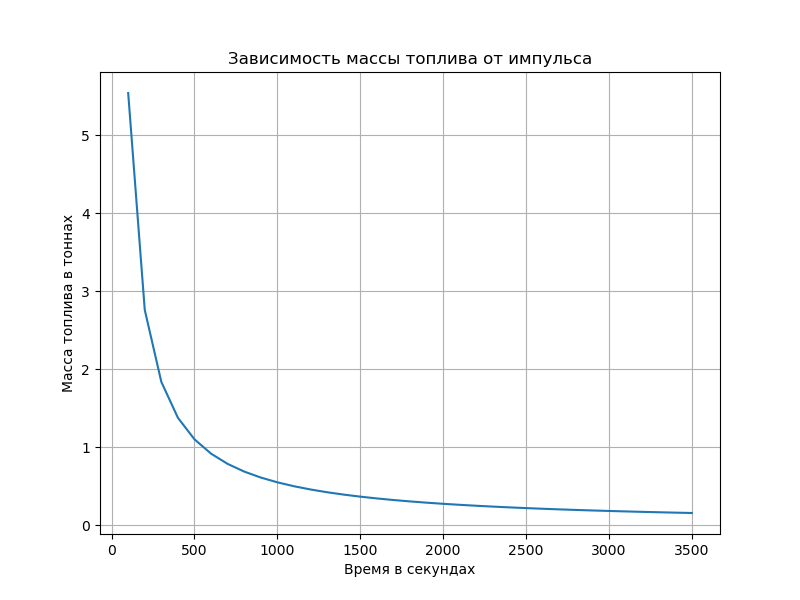

In [33]:
xpoints = np.array([0, 3500]) #  time/sec
ypoints = np.array([0, 1500]) #Mass/Tone

N = 3500
I=np.zeros(35)
mFuel=np.zeros(35)

for i in range(35):
    I[i] =100*i+100
    

for i in range(35):
    mFuel[i] = (mf*exp(dv/(I[i]*9.81))) - mf

plt.figure(figsize = (8,6)) 
plt.plot(I, mFuel)
   
plt.title("Зависимость массы топлива от импульса")   
plt.xlabel("Время в секундах")
plt.ylabel("Масса топлива в тоннах")
plt.grid()
plt.show()